In [195]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
import pandas as pd
from matplotlib import pyplot as plt

In [209]:
df = pd.read_csv('bitcoin_transactions.csv')
df = pd.DataFrame (df,columns=['date', 'open', 'high', 'low', 'close', 'volume', 'market_cap'])

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day']= df['date'].dt.day

In [210]:
df = df.iloc[::-1].reset_index()
df.drop('index', axis = 1).drop('date', axis =1)

,open,high,low,close,volume,market_cap,year,month,day
0,434.62,436.06,431.87,433.44,"30,096,600","6,517,390,487",2016,1,2
1,433.58,433.74,424.71,430.01,"39,633,800","6,467,429,942",2016,1,3
2,430.06,434.52,429.08,433.09,"38,477,500","6,515,713,340",2016,1,4
3,433.07,434.18,429.68,431.96,"34,522,600","6,500,393,256",2016,1,5
4,431.86,431.86,426.34,429.11,"34,042,500","6,458,942,098",2016,1,6
...,...,...,...,...,...,...,...,...,...
1880,"48,835.09","51,290.14","47,213.50","49,705.33","63,695,521,388","926,393,090,751",2021,2,24
1881,"49,709.08","51,948.97","47,093.85","47,093.85","54,506,565,949","877,766,126,138",2021,2,25
1882,"47,180.46","48,370.79","44,454.84","46,339.76","350,967,941,479","863,752,275,053",2021,2,26
1883,"46,344.77","48,253.27","45,269.03","46,188.45","45,910,946,382","860,978,135,421",2021,2,27


In [211]:
df['open']=df['open'].apply(lambda x: x.replace(',',''))
df['high']=df['high'].apply(lambda x: x.replace(',',''))
df['low']=df['low'].apply(lambda x: x.replace(',',''))
df['close']=df['close'].apply(lambda x: x.replace(',',''))
df['volume']=df['volume'].apply(lambda x: x.replace(',',''))
df['market_cap']=df['market_cap'].apply(lambda x: x.replace(',',''))

df['open'] = df['open'].astype(float)
df['high'] = df['high'].astype(float)
df['low'] = df['low'].astype(float)
df['close'] = df['close'].astype(float)
df['volume'] = df['volume'].astype(float)
df['market_cap'] = df['market_cap'].astype(float)


In [212]:
days_prediction = 30
df_train = df[:len(df) - days_prediction]
df_test = df[len(df) - days_prediction:]
df_train = df_train.drop('index', axis = 1).drop('date', axis =1)
df_test = df_test.drop('index', axis = 1).drop('date', axis =1)

# df_test

In [213]:
df_test.head()
print(type(df_train))

<class 'pandas.core.frame.DataFrame'>


In [214]:
from sklearn.preprocessing import MinMaxScaler
df_train = df_train.reindex(columns=['open', 'high', 'low', 'volume', 'market_cap', 'year', 'month', 'day', 'close'])

In [215]:
print(train_set.shape)

(1855, 9)


In [216]:
X_train = train_set[:,0:8]
scaler_X = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)

y_train = train_set[:,-1]
y_train = np.reshape(y_train,(len(y_train),1))
print(y_train.shape)
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train)

(1855, 1)


In [217]:
print(X_train.shape, y_train.shape)
X_train= np.reshape(X_train, (len(X_train), 8, 1))

(1855, 8) (1855, 1)


In [218]:
X_train.shape

(1855, 8, 1)

In [219]:
df_test = df_test.reindex(columns=['open', 'high', 'low', 'volume', 'market_cap', 'year', 'month', 'day', 'close'])
X_test = test_set[:,0:8]
X_test = scaler_X.fit_transform(X_test)

y_test = test_set[:,-1]
y_test = np.reshape(y_test,(len(y_test),1))
print(y_test.shape)
y_test = scaler_y.fit_transform(y_test)

X_test= np.reshape(X_test, (len(X_test), 8, 1))

(30, 1)


In [220]:
X_test.shape

(30, 8, 1)

In [221]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [240]:
from keras.callbacks import EarlyStopping
regressor = Sequential()

regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (8, 1), return_sequences=True))
regressor.add(LSTM(units = 10, activation = 'relu', return_sequences=True))

regressor.add(LSTM(8))
regressor.add(Dense(5))
regressor.add(Dense(1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
early_stopping = EarlyStopping(monitor='loss', patience=100, mode='auto')

regressor.fit(X_train, y_train, batch_size = 7, epochs = 100, callbacks = [early_stopping])

Epoch 1/100
1855/1855 [==============================] - 10s 5ms/step - loss: 0.0073
Epoch 2/100
1855/1855 [==============================] - 6s 3ms/step - loss: 6.5362e-04
Epoch 3/100
1855/1855 [==============================] - 6s 3ms/step - loss: 4.8539e-04
Epoch 4/100
1855/1855 [==============================] - 6s 3ms/step - loss: 4.3264e-04
Epoch 5/100
1855/1855 [==============================] - 6s 3ms/step - loss: 3.4794e-04
Epoch 6/100
1855/1855 [==============================] - 6s 3ms/step - loss: 2.4462e-04
Epoch 7/100
1855/1855 [==============================] - 6s 3ms/step - loss: 2.4174e-04
Epoch 8/100
1855/1855 [==============================] - 6s 3ms/step - loss: 2.0927e-04
Epoch 9/100
1855/1855 [==============================] - 6s 3ms/step - loss: 1.7997e-04
Epoch 10/100
1855/1855 [==============================] - 6s 3ms/step - loss: 1.5242e-04
Epoch 11/100
1855/1855 [==============================] - 6s 3ms/step - loss: 1.5345e-04
Epoch 12/100
1855/1855 [=========

1855/1855 [==============================] - 6s 3ms/step - loss: 7.8488e-05
Epoch 94/100
1855/1855 [==============================] - 6s 3ms/step - loss: 8.4607e-05
Epoch 95/100
1855/1855 [==============================] - 6s 3ms/step - loss: 9.2567e-05
Epoch 96/100
1855/1855 [==============================] - 6s 3ms/step - loss: 8.1347e-05
Epoch 97/100
1855/1855 [==============================] - 6s 3ms/step - loss: 8.1444e-05
Epoch 98/100
1855/1855 [==============================] - 6s 3ms/step - loss: 9.6124e-05
Epoch 99/100
1855/1855 [==============================] - 6s 3ms/step - loss: 8.9705e-05
Epoch 100/100
1855/1855 [==============================] - 6s 3ms/step - loss: 9.8443e-05


In [241]:
predicted_BTC_price = regressor.predict(X_test)
predicted_BTC_price = predicted_BTC_price.reshape(30,1)

predicted_BTC_price = scaler_y.inverse_transform(predicted_BTC_price)
print(predicted_BTC_price)

[[0.03693544]
 [0.01778663]
 [0.0156665 ]
 [0.04885777]
 [0.12778509]
 [0.18274623]
 [0.17005849]
 [0.24423254]
 [0.23505957]
 [0.3588971 ]
 [0.5557616 ]
 [0.5299875 ]
 [0.5390581 ]
 [0.5986573 ]
 [0.5782477 ]
 [0.6092818 ]
 [0.6102156 ]
 [0.63794595]
 [0.71118146]
 [0.7489691 ]
 [0.8124412 ]
 [0.89105135]
 [0.9090599 ]
 [0.87312657]
 [0.7742502 ]
 [0.66353744]
 [0.6820546 ]
 [0.6038361 ]
 [0.5519338 ]
 [0.5038546 ]]


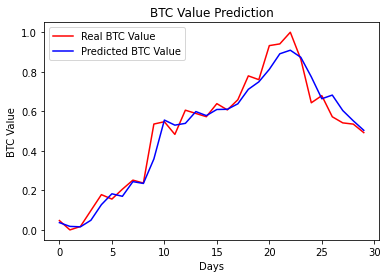

In [242]:
plt.plot(y_test, color = 'red', label = 'Real BTC Value')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Value')
plt.title('BTC Value Prediction')
plt.xlabel('Days')
plt.ylabel('BTC Value')
plt.legend()
plt.show()